***HW2 - Detecting Type 1 Diabetes***

# Theory Assignment

Theoretical questions

**Q1**: To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

**A1**: Performance means how good our model is doing its job. Accuracy is the number of correct predictions made by the model by the total number of records. For us, performance is more important because accuracy can be deceiving if the data is not representive enough.
For instance, if we use a binary naive classifier to determine whether a person has cancer, However the data only includes 5 positive cases out of 100 patients, we get 95% accuracy.

**Q2**: T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

**A2**: 

Using BMI and BP:
    
    pros
      - Weights will be easier to find.
      - The calculations will be simpler.
      - Data cleanning will only include two coloumns.
    cons
      - We can't be sure that these are the most important features. This can lead to diminished performance and crucial mistakes. 
        For example, a false negative case; One may not be treated well which can lead to devastating consequences.
    
Using all features:

    pros
      - The model will most likely perform better and will have better accuracy (under the assumption that our data is reliable enough)
    cons
      - Data exploration and cleanning will be difficult.
      - We'll have a lot of data meanning extended computation time.
    
        

**Q3**: A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

**A3**:

We can assume that the data won't be linearly seperable since the samples look alike and have similar properties.
Thus, we will use SVM with a nonlinear kernel to find the correct boundary line.

**Q4**: What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

**A4**: LR - returns the probabilities to be a part of a certain class. 

Linear SVM - returns where each patient will be labeled.

There is one hyperparameter to tune - lambda (or C in python which is 1/lambda). 
This hyperparameter determines the bias - variance tradeoff, meaning that for low values of lambda (or high values of C), our model can be complex and we risk overfitting our training examples(high variance). in this case the model will memorise, not learn.

For high values of lambda (or low values of C) we "punish" harder our model for each misclassification and risk having an underfit condition, meaning that our model will be too simple (high bias).


# Coding Assignment:

Import and load packages:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import distutils
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Ext_Functions import str_to_bool_series

# **Q1 - Data loading and preprocessing:**

Load data:

In [2]:
df_orig = pd.read_csv('HW2_data.csv')

Transfer all data to binary numeric values:

In [3]:
from Ext_Functions import nan2num

df = df_orig
for column in df.columns:
    df[column] = str_to_bool_series(df_orig[column])
df.tail()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,1,1,1,1,1,0,NaN,1,1,1,1,1,1,0,0,1,0
561,32,1,0,0,0,0,0,NaN,0,0,1,1,0,0,0,1,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
564,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Clean NaN's:


In [4]:
t1d_clean = nan2num(df)
t1d_clean

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,45,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,40,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,54,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0
561,32,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


Scale Age column:

In [5]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
t1d_clean[['Age']] = min_max_scaler.fit_transform(t1d_clean[['Age']])
t1d_clean

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,0.391892,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,0.351351,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.391892,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,0.581081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.324324,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.513514,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0
561,0.216216,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0
562,0.608108,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


# **Q2 -  Split the data into Test Train 20%**

In [6]:
diagnosis = t1d_clean['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(t1d_clean, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))
X_test

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
65,0.621622,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0
435,0.283784,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
71,0.418919,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
554,0.256757,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0
75,0.540541,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.459459,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1
481,0.364865,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
272,0.189189,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
552,0.148649,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# **Q3 - Visualization and exploration of the data**



# Distribution of the features:

In [7]:
from Ext_Functions import print_dist_features
print_dist_features(t1d_clean, X_train, X_test)

Feature            | Train % | Test % | Difference
Age                  0.43     0.43     0.0     
Gender               63.94     62.83     1.11
Increased Urination  48.23     48.67     -0.44
Increased Thirst     44.03     38.05     5.98
Sudden Weight Loss   39.16     45.13     -5.97
Weakness             56.42     60.18     -3.76
Increased Hunger     46.46     43.36     3.1
Genital Thrush       22.79     29.2      -6.41
Visual Blurring      45.8      41.59     4.21
Itching              48.23     44.25     3.98
Irritability         23.01     25.66     -2.65
Delayed Healing      46.9      43.36     3.54
Partial Paresis      42.7      42.48     0.22
Muscle Stiffness     35.62     36.28     -0.66
Hair Loss            34.29     41.59     -7.3
Obesity              17.48     14.16     3.32
Diagnosis            60.62     61.06     -0.44
Family History       50.22     52.21     -1.99


**Section a**

**1 + 2.** Imbalance between train and test sets could cause the learning algorithm to fail in classification of the test set.
Balance can be achieved using stratification or normalization. in our case, due to the booleanic nature of the data, its better to use stratification.

**Section b - relationship between feature and label:**

These plots show the relationship between each feature and label. The age feature is shown in zoom-in plot because it has many details and was not clear in a small plot

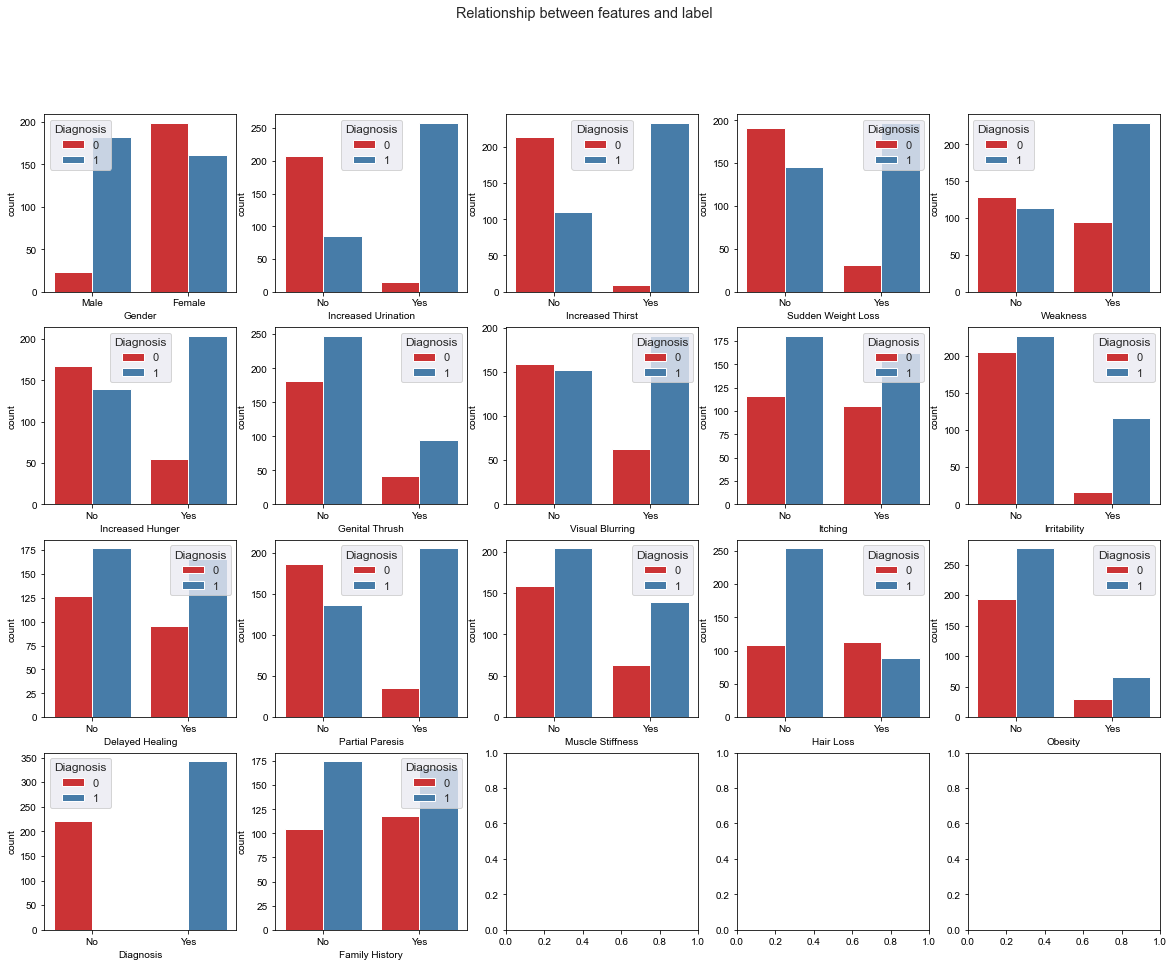

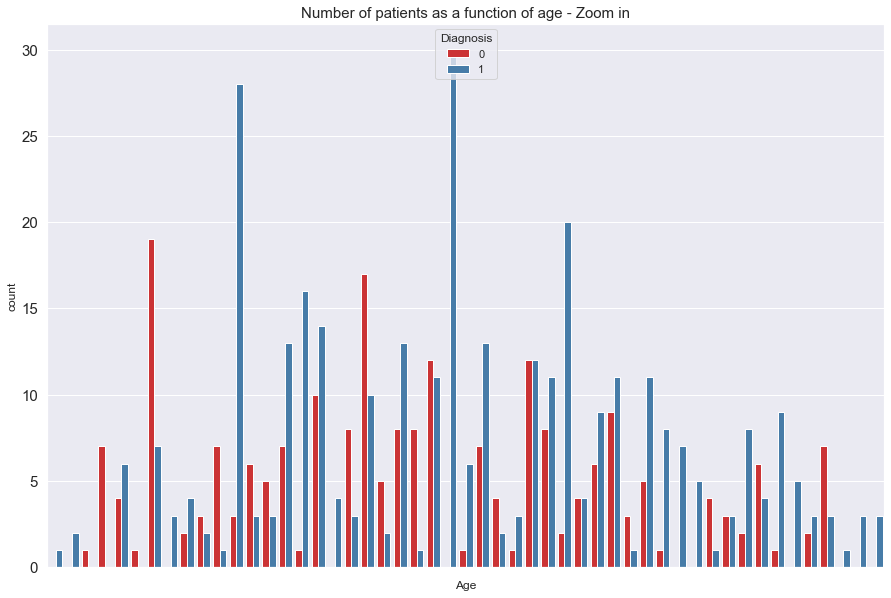

In [8]:
import seaborn as sbn
import matplotlib.ticker as ticker
from Ext_Functions import feature_corr

feature_corr(t1d_clean)

fig, axes = plt.subplots(1, 1,figsize=(15, 10) )


# Plot Age seperately:
title_text = 'Number of patients as a function of age - Zoom in'
feat_lab = sbn.countplot(ax = axes, x='Age', hue = 'Diagnosis', data = t1d_clean)
feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
feat_lab.set_title(title_text, fontsize=15)
axes.tick_params(axis='both', which='major', labelsize=15)

**Section d**

**1.** We were surprised to see that there are much more diagnosed men than women. One could expect that the men's and women's distributions will be similar, yet we see that the ratio between ill and healthy patients is less than 1 at the women's section and way over 1 at the men's section.

**2.** In order to determine which features are important, we have to look for two major properties for each feature:

    1. On the yes label - high number of diagnosed patients (label - 1) compared to the healthy ones.
    
    2. On the no label - the opposite of 1. A high number of healthy patients compared to the sick ones will indicate that this feature is important.

From the graphs above, it seems that the features "increased thirst" ,"increased hunger" and "increased urination" are going to be significant.

In [9]:
X_train = X_train.drop(columns=['Diagnosis'])
X_test = X_test.drop(columns=['Diagnosis'])

# **Q4 - One Hot Vector**

**We have already done this step - manually - in the data pre-processing stage**

In [10]:
X_train_ohv = X_train
X_test_ohv = X_test
y_train_ohv = y_train
y_test_ohv = y_test

(X_train_ohv)

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
6,0.364865,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1
404,0.297297,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
322,0.486486,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,0
97,0.527027,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.500000,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
147,0.310811,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
24,0.324324,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
269,0.256757,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1


# **Q5 - 5Kfold**

**Section a**

We shall use the logistic regression model as the linear one and the support vector machine model with a nonlinear kernel as the nonlinear one. 

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [12]:
from Ext_Functions import cv_kfold
from Ext_Functions import pred_log

**Test and Fit the models**

In [13]:
C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict = cv_kfold(X_train_ohv, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict))



         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.670464  0.001860  0.500000  0.611111
1     0.01      l2  0.478411  0.012889  0.976768  0.923077
2     0.10      l1  0.302205  0.039523  0.987121  0.934066
3     0.10      l2  0.284617  0.025595  0.986111  0.934066
4     1.00      l1  0.198206  0.045432  0.991512  0.956044
5     1.00      l2  0.203477  0.033378  0.989198  0.945055
6     5.00      l1  0.200081  0.046626  0.990741  0.956044
7     5.00      l2  0.196206  0.040634  0.989712  0.956044
8    10.00      l1  0.202515  0.046781  0.990741  0.956044
9    10.00      l2  0.198302  0.043172  0.990226  0.956044
10  100.00      l1  0.206383  0.047591  0.990741  0.956044
11  100.00      l2  0.205234  0.047047  0.990741  0.945055


We'll seek the best parameters according to AUC.

The chosen parameters are as follows:

In [18]:
c = 1
p = 'l1'
lr_best_model = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv)
y_pred_p_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv, flag=True)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([1, 100, 1000])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                        'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear.fit(X_train_ohv, y_train_ohv)

best_svm_nonlin = svm_nonlinear.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear.best_params_)

Parameters to get best svm are: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


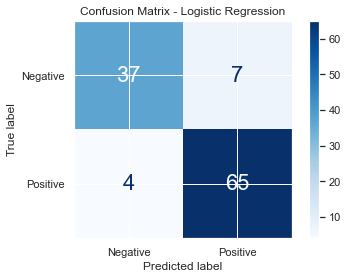

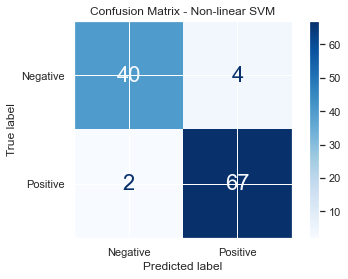

In [20]:
from sklearn.metrics import plot_confusion_matrix


disp_lr = plot_confusion_matrix(lr_best_model, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_lr.ax_.set_title("Confusion Matrix - Logistic Regression")

disp_svm = plot_confusion_matrix(best_svm_nonlin, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_svm.ax_.set_title("Confusion Matrix - Non-linear SVM")

plt.show()

**Section b**

Plot statistics for all algorithms:

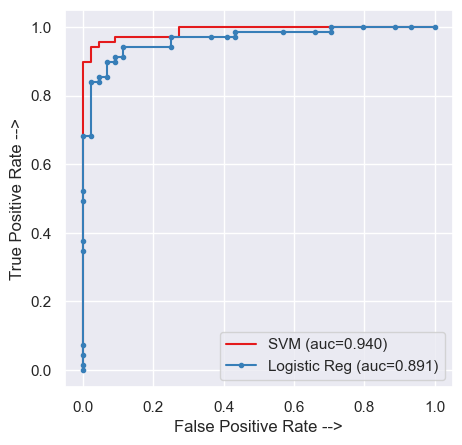

Logistic Regression Results:
Test set results:
Accuracy is: 90.27%
F1 score is: 89.63%
AUC is: 89.15%

Train set results:
Accuracy is: 93.36%
F1 score is: 93.06%
AUC is: 93.15%

SVM Results:
Test set results:
Accuracy is: 94.69%
F1 score is: 94.37%
AUC is: 94.01%

Train set results:
Accuracy is: 99.56%
F1 score is: 99.54%
AUC is: 99.44%


In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from Ext_Functions import parameter_evaluation
# lr = Logistic Regression
# svm = Support Vector Machine


model_lr = lr_best_model
model_svm = best_svm_nonlin
y_pred_lr = model_lr.decision_function(X_test_ohv)
lr_fpr, lr_tpr, threshold = roc_curve(y_test_ohv, y_pred_lr)
y_pred_lr_train = (model_lr.predict(X_train_ohv)).astype("int32")
y_pred_lr_test = (model_lr.predict(X_test_ohv)).astype("int32")
auc_lr = metrics.roc_auc_score(y_test,y_pred_lr_test)


y_pred_svm = model_svm.decision_function(X_test_ohv)
svm_fpr, svm_tpr, threshold = roc_curve(y_test_ohv, y_pred_svm)
y_pred_svm_train = (model_svm.predict(X_train_ohv)).astype("int32")
y_pred_svm_test = (model_svm.predict(X_test_ohv)).astype("int32")
auc_svm = metrics.roc_auc_score(y_test,y_pred_svm_test)


plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle = '-', label = 'SVM (auc=%0.3f)' %auc_svm)
plt.plot(lr_fpr, lr_tpr,marker='.' ,label = 'Logistic Reg (auc=%0.3f)' %auc_lr)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test,y_pred_lr_train)

print()
print('SVM Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test,y_pred_svm_train)

**Section c**

For this dataset, the SVM performs better, considering all the mathematical measurements and of course the graph. 

# **Q6 - Feature importance**

Feature: 0, Score: 0.09551
Feature: 1, Score: 0.09658
Feature: 2, Score: 0.24407
Feature: 3, Score: 0.16493
Feature: 4, Score: 0.04452
Feature: 5, Score: 0.02452
Feature: 6, Score: 0.03036
Feature: 7, Score: 0.02457
Feature: 8, Score: 0.03344
Feature: 9, Score: 0.02551
Feature: 10, Score: 0.03449
Feature: 11, Score: 0.03359
Feature: 12, Score: 0.06034
Feature: 13, Score: 0.01937
Feature: 14, Score: 0.03814
Feature: 15, Score: 0.02224
Feature: 16, Score: 0.00782


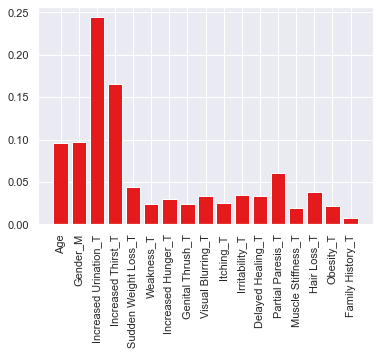

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
labels = ['Age','Gender_M', 'Increased Urination_T', 'Increased Thirst_T',
       'Sudden Weight Loss_T', 'Weakness_T',
        'Increased Hunger_T','Genital Thrush_T', 'Visual Blurring_T',  
        'Itching_T', 'Irritability_T','Delayed Healing_T',
        'Partial Paresis_T', 'Muscle Stiffness_T', 'Hair Loss_T',
        'Obesity_T','Family History_T']
t= np.arange(0,17)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(t,labels, rotation='vertical')
plt.show()

**Section a, 1+2**

As we can see, the 2 most important features are increased urination and increased thirst.

This matches up with the feature - label correlation from Q3. Looking at the graphs, we can see that these features are the most meaningful ones since they have the largest number of diagnosed patients. Also, among the patients who do have increased urination\thirst, the number of the healthy ones is the lowest in comparison to the diagnsed ones.

# Q7 - Data Separability Visualization

**Section a**

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
scaler = StandardScaler()
X_train_copy = scaler.fit_transform(X_train_ohv)
X_test_copy = scaler.transform(X_test_ohv)
X_train_pca = pca.fit_transform(X_train_copy)
X_test_pca = pca.transform(X_test_copy)

In [21]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

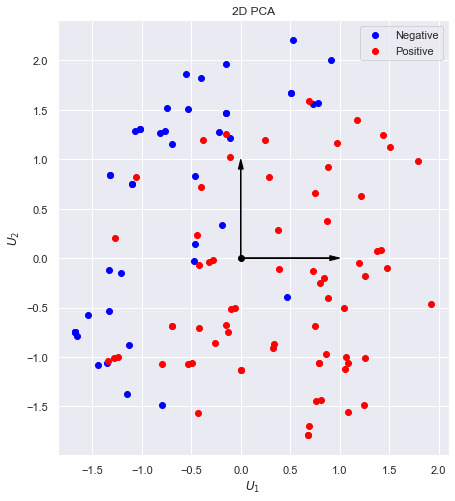

In [22]:
plt_2d_pca(X_test_pca,y_test)

**Section b**

As can be seen above, the data is not linearly seperable. It is possible to use a linear classifier, however the boundary condition may be misleading.

**Section c**

In [23]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix

Finding the best parameters for the new-2D-data:

In [24]:
#Logistic Regression:

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict_pca = cv_kfold(X_train_pca, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict_pca))

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.643823  0.013763  0.874286  0.611111
1     0.01      l2  0.480352  0.008257  0.955247  0.879121
2     0.10      l1  0.327843  0.019342  0.955761  0.890110
3     0.10      l2  0.340109  0.018015  0.957305  0.890110
4     1.00      l1  0.308175  0.030416  0.956276  0.890110
5     1.00      l2  0.308841  0.028119  0.956276  0.890110
6     5.00      l1  0.308125  0.032549  0.956276  0.890110
7     5.00      l2  0.307977  0.031813  0.956276  0.890110
8    10.00      l1  0.308161  0.032851  0.956276  0.890110
9    10.00      l2  0.308054  0.032448  0.956276  0.890110
10  100.00      l1  0.308197  0.033111  0.956276  0.890110
11  100.00      l2  0.308180  0.033072  0.956276  0.890110


Now, we choose the best parameters (best AUC)

In [25]:
c = 0.1
p = 'l2'
lr_best_model_pca = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best_pca, _ = pred_log(lr_best_model_pca, X_train_pca, y_train_ohv, X_test_pca)
y_pred_prob_best_pca, _ = pred_log(lr_best_model_pca, X_train_pca, y_train_ohv, X_test_pca, flag=True)

In [26]:
n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([0.1, 1, 10, 100, 1000])
degree = np.array([1, 2, 3, 4, 5])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear_pca = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'], 
                        'svm__degree': degree, 'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear_pca.fit(X_train_pca, y_train_ohv)

best_svm_nonlin_pca = svm_nonlinear_pca.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear_pca.best_params_)

Parameters to get best svm are: {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}


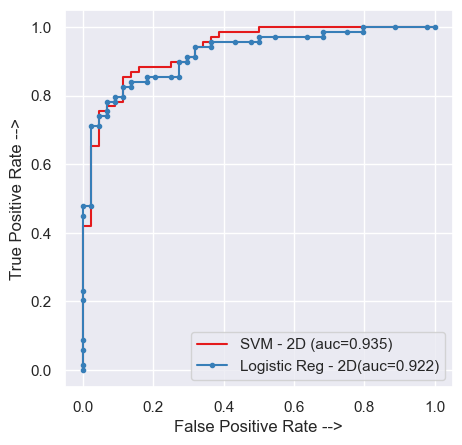

Logistic Regression Results:
Test set results:
Accuracy is: 84.07%
Precision is: 88.06%
recall is: 85.51%
F1 score is: 83.38%
AUC is: 83.66%

Train set results:
Train accuracy is: 85.18%
Train precision is: 89.06%
Train recall is: 86.13%
Train F1 score is: 84.61%
Train AUC is: 84.92%

SVM Results:
Test set results:
Accuracy is: 85.84%
Precision is: 88.41%
recall is: 88.41%
F1 score is: 85.11%
AUC is: 85.11%

Train set results:
Train accuracy is: 88.05%
Train precision is: 86.67%
Train recall is: 94.89%
Train F1 score is: 87.11%
Train AUC is: 86.21%


In [27]:
#Predict + fit for LR and SVM (PCA):

lr_best_model_pca.fit(X_train_pca, y_train)
y_pred_test_pca = lr_best_model_pca.predict(X_test_pca)

model_lr_pca = lr_best_model_pca
model_svm_pca = best_svm_nonlin_pca

y_pred_lr_pca = model_lr_pca.decision_function(X_test_pca)
lr_fpr_pca, lr_tpr_pca, threshold_pca = roc_curve(y_test_ohv, y_pred_lr_pca)
y_pred_lr_train_pca = (model_lr_pca.predict(X_train_pca)).astype("int32")
y_pred_lr_test_pca = (model_lr_pca.predict(X_test_pca)).astype("int32")
# auc_lr_pca = metrics.roc_auc_score(y_test,y_pred_lr_test_pca)
auc_lr_pca = metrics.roc_auc_score(y_test,y_pred_lr_pca)

y_pred_svm_pca = best_svm_nonlin_pca.decision_function(X_test_pca)
svm_fpr_pca, svm_tpr_pca, threshold_pca = roc_curve(y_test_ohv, y_pred_svm_pca)
y_pred_svm_train_pca = (best_svm_nonlin_pca.predict(X_train_pca)).astype("int32")
y_pred_svm_test_pca = (best_svm_nonlin_pca.predict(X_test_pca)).astype("int32")
# auc_svm_pca = metrics.roc_auc_score(y_test,y_pred_svm_test_pca)
auc_svm_pca = metrics.roc_auc_score(y_test,y_pred_svm_pca)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr_pca, svm_tpr_pca, linestyle = '-', label = 'SVM - 2D (auc=%0.3f)' %auc_svm_pca)
plt.plot(lr_fpr_pca, lr_tpr_pca,marker='.' ,label = 'Logistic Reg - 2D(auc=%0.3f)' %auc_lr_pca)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test_pca,y_pred_lr_train_pca)

print()
print('SVM Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test_pca,y_pred_svm_train_pca)

**Section d:**

In [28]:
feat_name =['Increased Urination','Increased Thirst']
X_train_2f = X_train[feat_name]
X_test_2f =  X_test[feat_name]

Again - finding the best parameters for the new data:

In [29]:
#Logistic Regression:

X_train_2f = pd.DataFrame(X_train_2f)
X_test_2f = pd.DataFrame(X_test_2f)

C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict_2f = cv_kfold(X_train_2f, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict_2f))

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.672028  0.003259  0.500000  0.611111
1     0.01      l2  0.547340  0.010403  0.963636  0.611111
2     0.10      l1  0.352937  0.046566  0.959091  0.934066
3     0.10      l2  0.375572  0.039215  0.963636  0.934066
4     1.00      l1  0.328855  0.064394  0.959091  0.934066
5     1.00      l2  0.330046  0.060470  0.959091  0.934066
6     5.00      l1  0.328896  0.066506  0.959091  0.934066
7     5.00      l2  0.328631  0.065454  0.959091  0.934066
8    10.00      l1  0.328951  0.066774  0.959091  0.934066
9    10.00      l2  0.328768  0.066230  0.959091  0.934066
10  100.00      l1  0.329045  0.067004  0.959091  0.934066
11  100.00      l2  0.328993  0.066967  0.959091  0.934066


Choosing the best parameters according to AUC:

In [30]:
c = 0.1
pen = 'l2'
lr_best_model_2f = LogisticRegression(solver='saga', multi_class='ovr', penalty=pen, C=c, max_iter=10000, random_state=10)
y_pred_best_2f, _ = pred_log(lr_best_model_2f, X_train_2f, y_train_ohv, X_test_2f)
y_pred_prob_best_2f, _ = pred_log(lr_best_model_2f, X_train_2f, y_train_ohv, X_test_pca, flag=True)

In [31]:
n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model_2f = SVC(probability=True)
C = np.array([0.1, 1, 10, 100, 1000])
degree = np.array([1, 2, 3, 4, 5])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear_2f = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'], 
                        'svm__degree': degree, 'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear_2f.fit(X_train_2f, y_train_ohv)

best_svm_nonlin_2f = svm_nonlinear_2f.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear_2f.best_params_)

Parameters to get best svm are: {'svm__C': 1.0, 'svm__degree': 5, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}


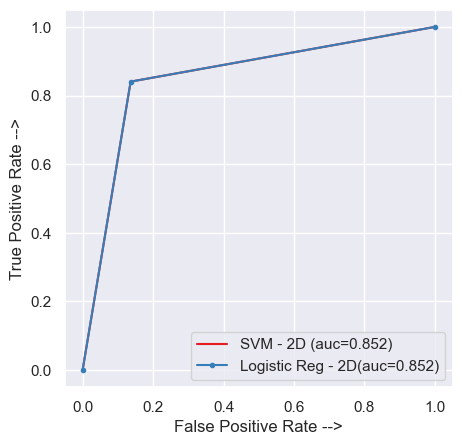

Logistic Regression Results:
Test set results:
Accuracy is: 84.96%
Precision is: 90.62%
recall is: 84.06%
F1 score is: 84.47%
AUC is: 85.21%

Train set results:
Train accuracy is: 87.39%
Train precision is: 92.89%
Train recall is: 85.77%
Train F1 score is: 87.03%
Train AUC is: 87.83%

SVM Results:
Test set results:
Accuracy is: 84.96%
Precision is: 90.62%
recall is: 84.06%
F1 score is: 84.47%
AUC is: 85.21%

Train set results:
Train accuracy is: 87.39%
Train precision is: 92.89%
Train recall is: 85.77%
Train F1 score is: 87.03%
Train AUC is: 87.83%


In [40]:
#Predict + fit for LR and SVM (2 features):

lr_best_model_2f.fit(X_train_2f, y_train)
y_pred_test_2f = lr_best_model_2f.predict(X_test_2f)

model_lr_2f = lr_best_model_2f
model_svm_2f = best_svm_nonlin_2f

y_pred_lr_2f = model_lr_2f.decision_function(X_test_2f)
# lr_fpr_2f, lr_tpr_2f, threshold_2f = roc_curve(y_test_ohv, y_pred_lr_2f)
y_pred_lr_train_2f = (model_lr_2f.predict(X_train_2f)).astype("int32")
y_pred_lr_test_2f = (model_lr_2f.predict(X_test_2f)).astype("int32")
auc_lr_2f = metrics.roc_auc_score(y_test,y_pred_lr_test_2f)
lr_fpr_2f, lr_tpr_2f, threshold_2f = roc_curve(y_test_ohv, y_pred_lr_test_2f)

y_pred_svm_2f = model_svm_2f.decision_function(X_test_2f)
# svm_fpr_2f, svm_tpr_2f, threshold_2f = roc_curve(y_test_ohv, y_pred_svm_2f)
y_pred_svm_train_2f = (model_svm_2f.predict(X_train_2f)).astype("int32")
y_pred_svm_test_2f = (model_svm_2f.predict(X_test_2f)).astype("int32")
auc_svm_2f = metrics.roc_auc_score(y_test,y_pred_svm_test_2f)
svm_fpr_2f, svm_tpr_2f, threshold_2f = roc_curve(y_test_ohv, y_pred_svm_test_2f)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr_2f, svm_tpr_2f, linestyle = '-', label = 'SVM - 2D (auc=%0.3f)' %auc_svm_2f)
plt.plot(lr_fpr_2f, lr_tpr_2f,marker='.' ,label = 'Logistic Reg - 2D(auc=%0.3f)' %auc_lr_2f)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test_2f,y_pred_lr_train_2f)

print()
print('SVM Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test_2f,y_pred_svm_train_2f)

We can see that for two features, we got the same results.

It is possible that when we use two features, our data becomes linearly seperable, so even if we try to classify if with a nonlinear classifier, there will be no difference. 

**Section e**

As we can see from the graphs above, PCA performed better, it had larger AUC.

This is as expected, since PCA finds 2 axes that are the best combination of all the features, as opposed to just using the two best features.

However, there is a problem applying PCA over our data. PCA's principles are to transfer the origin to the mean of the data and then find the axe with maximized variance. 

In this case, the data is binary, so mean and variance are meaningless. 